### Multi Cross :
        Linear Model x3 : KO
        MLP (2, 46, 46, 3): OK 1m alpha : 0.001

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from MyMLP.MyMLP import MyMLP

In [2]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

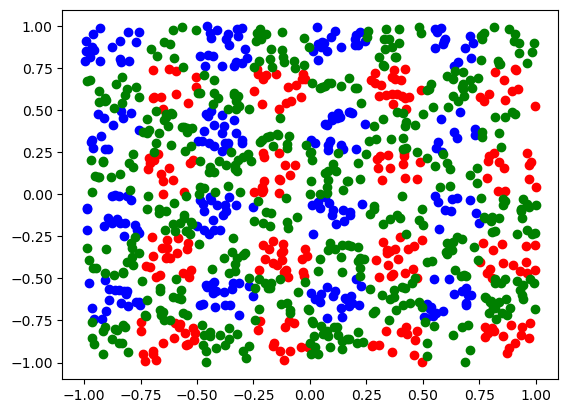

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [5]:
my_mlp = MyMLP([2,50,50,3])

In [6]:
# Train the model on the test case
my_mlp.train(X , Y, is_classification=True, iteration_count=1000000, alpha=0.001)

# Convert X to a list of lists
# Display the predicted outputs of the model
predictions =[my_mlp.predict(x, is_classification=True) for x in X]
print(predictions)
accuracy = my_mlp.calculate_accuracy(X,Y)
print(accuracy)
# Calculate the loss on the test case

#print("Loss:", my_mlp.loss)


[[-0.178059949856159, 0.34870061511332867, 0.6590394706234932], [0.4646502901620674, -0.018809479963616833, 0.6246901648093891], [-0.2175190337606979, 0.580812097027985, 0.6130917021300156], [0.0003380035641274141, 0.5506932070193542, 0.4496024492095669], [0.058194394086472, 0.4815973819687105, 0.47482468517787635], [0.2739109063109047, 0.0959058486525845, 0.5834263017484168], [-0.011655492956884901, 0.44646489063986555, 0.5490603850279356], [0.11003499708951994, 0.17279226060507405, 0.6470253653610372], [0.26353391491287614, 0.16868654993323895, 0.4866117629045677], [-0.22116816193062624, 0.43177538081252487, 0.6425021929872692], [0.1275586016233635, 0.5565727034194644, 0.4137127756251871], [0.06647652525738071, 0.248786920168755, 0.6400342863717143], [-0.03584539490785972, 0.5316064150776302, 0.4834632416545658], [0.517324024566153, -0.11125123902064454, 0.4706880396934429], [0.537947793758074, -0.17224450917485082, 0.5727791176943962], [0.2614474516774655, 0.18536471827076756, 0.599

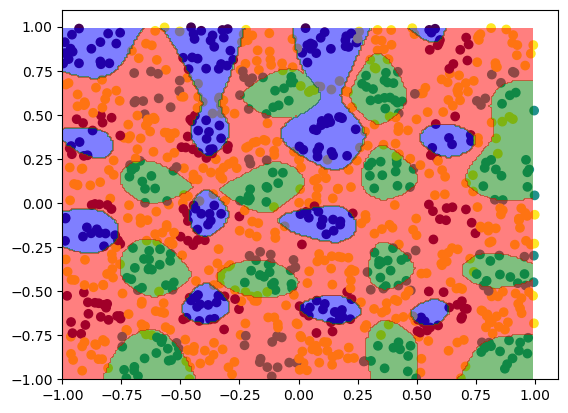

In [8]:
x_min, x_max = -1., 1.
y_min, y_max = -1., 1.
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
gridpoints = np.c_[xx.ravel(), yy.ravel()]

output_ptr =  [my_mlp.predict(x, is_classification=True) for x in gridpoints]
output_ptr = np.array(output_ptr)

plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1))

contour = np.argmax(output_ptr, axis=1).reshape(xx.shape)
plt.contourf(xx, yy, contour, levels=[-np.inf, 0.5, 1.5, np.inf], colors=['blue', 'green', 'red'],
             alpha=0.5)

plt.show()